In [1]:
import csv
import numpy as np
import matplotlib.pyplot as plt
import japanize_matplotlib

In [2]:
# displacement_refからのdisplacementのズレを計算
def calc_err(displacement, displacement_ref):
    dvec = np.zeros(2 * len(displacement))
    dvec_ref = np.zeros(2 * len(displacement))
    for i in range(len(displacement)):
        dvec[2 * i] = displacement[i][0]
        dvec[2 * i + 1] = displacement[i][1]
        dvec_ref[2 * i] = displacement_ref[i][0]
        dvec_ref[2 * i + 1] = displacement_ref[i][1]
    return np.linalg.norm(dvec - dvec_ref) / np.linalg.norm(dvec_ref)

In [3]:
displacement_ref = np.loadtxt(
    "output/div5/displacement_node_cart.csv", delimiter=",", skiprows=1)[:, 2:]
err_cart = []
err_curv = []
nelement = []
for path in ["model/div1/cny.csv",
             "model/div2/cny.csv", "model/div3/cny.csv", "model/div4/cny.csv"]:
    cny = np.loadtxt(path, delimiter=",", skiprows=1)
    nelement.append(len(cny))
for path in ["output/div1/displacement_node_cart.csv",
             "output/div2/displacement_node_cart.csv", "output/div3/displacement_node_cart.csv", "output/div4/displacement_node_cart.csv"]:
    displacement = np.loadtxt(path, delimiter=",", skiprows=1)[:, 2:]
    err_cart.append(calc_err(displacement, displacement_ref))
for path in ["output/div1/displacement_node_curv.csv",
             "output/div2/displacement_node_curv.csv", "output/div3/displacement_node_curv.csv", "output/div4/displacement_node_curv.csv"]:
    displacement = np.loadtxt(path, delimiter=",", skiprows=1)[:, 2:]
    err_curv.append(calc_err(displacement, displacement_ref))


In [4]:
err_cart

[0.08649165148158376,
 0.039198748303080636,
 0.015096727197452519,
 0.004238520055218066]

In [5]:
err_curv

[0.11746871196084291,
 0.04211079512981122,
 0.01349609719763277,
 0.0033692666394569684]

In [6]:
nelement

[24, 96, 384, 1536]

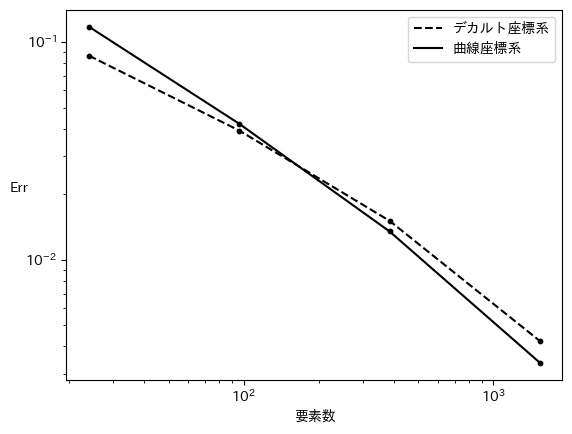

In [7]:
fig, ax = plt.subplots()
ax.scatter(nelement, err_cart, c="black", s=10)
ax.scatter(nelement, err_curv, c="black", s=10)
ax.plot(nelement, err_cart, c="black", linestyle="dashed", label="デカルト座標系")
ax.plot(nelement, err_curv, c="black", linestyle="solid", label="曲線座標系")
ax.set_xlabel("要素数")
ax.set_ylabel("Err", rotation=0)
ax.legend(loc="best")
ax.set_xscale("log")
ax.set_yscale("log")